In [119]:
import numpy as np
import scipy as sci
import matplotlib.pyplot as plt
from math import sqrt

In [120]:
################################################################################
# We now implement the bisection method. Note that this can also be written in a
# separate python file and imported as a module
def bisect_method(f,a,b,tol,nmax,vrb=False):
    #Bisection method applied to f between a and b

    # Initial values for interval [an,bn], midpoint xn
    an = a; bn=b; n=0;
    xn = (an+bn)/2;
    # Current guess is stored at rn[n]
    rn=np.array([xn]);
    r=xn;
    ier=0;

    if vrb:
        print("\n Bisection method with nmax=%d and tol=%1.1e\n" % (nmax, tol));

    # The code cannot work if f(a) and f(b) have the same sign.
    # In this case, the code displays an error message, outputs empty answers and exits.
    if f(a)*f(b)>=0:
        print("\n Interval is inadequate, f(a)*f(b)>=0. Try again \n")
        print("f(a)*f(b) = %1.1f \n" % f(a)*f(b));
        r = None;
        return r
    else:
        #If f(a)f(b), we proceed with the method.
        if vrb:
            print("\n|--n--|--an--|--bn--|----xn----|-|bn-an|--|---|f(xn)|---|");

            # We start two plots as subplots in the same figure.
            fig, (ax1, ax2) = plt.subplots(1, 2); #Creates figure fig and subplots
            fig.suptitle('Bisection method results'); #Sets title of the figure
            ax1.set(xlabel='x',ylabel='y=f(x)'); #Sets labels for axis for subplot 1
            # We plot y=f(x) on the left subplot.
            xl=np.linspace(a,b,100,endpoint=True); yl=f(xl);
            ax1.plot(xl,yl);

        while n<=nmax:
            if vrb:
                print("|--%d--|%1.4f|%1.4f|%1.8f|%1.8f|%1.8f|" % (n,an,bn,xn,bn-an,np.abs(f(xn))));

                ################################################################
                # Plot results of bisection on subplot 1 of 2 (horizontal).
                xint = np.array([an,bn]);
                yint=f(xint);
                ax1.plot(xint,yint,'ko',xn,f(xn),'rs');
                ################################################################

            # Bisection method step: test subintervals [an,xn] and [xn,bn]
            # If the estimate for the error (root-xn) is less than tol, exit
            if (bn-an)<2*tol: # better test than np.abs(f(xn))<tol
                ier=1;
                break;

            # If f(an)*f(xn)<0, pick left interval, update bn
            if f(an)*f(xn)<0:
                bn=xn;
            else:
                #else, pick right interval, update an
                an=xn;

            # update midpoint xn, increase n.
            n += 1;
            xn = (an+bn)/2;
            rn = np.append(rn,xn);

    # Set root estimate to xn.
    r=xn;

    if vrb:
        ########################################################################
        # subplot 2: approximate error log-log plot
        e = np.abs(r-rn[0:n]);
        #length of interval
        ln = (b-a)*np.exp2(-np.arange(0,e.size));
        #log-log plot error vs interval length
        ax2.plot(-np.log2(ln),np.log2(e),'r--');
        ax2.set(xlabel='-log2(bn-an)',ylabel='log2(error)');
        ########################################################################

    return r, rn;
################################################################################

In [121]:
################################################################################
# We now implement the Newton method
def newton_method(f,df,x0,tol,nmax,verb=False):
    #newton method to find root of f starting at guess x0

    #Initialize iterates and iterate list
    xn=x0;
    rn=np.array([x0]);
    # function evaluations
    fn=f(xn); dfn=df(xn);
    nfun=2; #evaluation counter nfun
    dtol=1e-10; #tolerance for derivative (being near 0)

    if abs(dfn)<dtol:
        #If derivative is too small, Newton will fail. Error message is
        #displayed and code terminates.
        if verb:
            print('\n derivative at initial guess is near 0, try different x0 \n');
    else:
        n=0;
        if verb:
            print("\n|--n--|----xn----|---|f(xn)|---|---|f'(xn)|---|");

        #Iteration runs until f(xn) is small enough or nmax iterations are computed.

        while n<=nmax:
            if verb:
                print("|--%d--|%1.8f|%1.8f|%1.8f|" %(n,xn,np.abs(fn),np.abs(dfn)));

            pn = - fn/dfn; #Newton step
            if np.abs(pn)<tol or np.abs(fn)<2e-15:
                break;

            #Update guess adding Newton step
            xn = xn + pn;

            # Update info and loop
            n+=1;
            rn=np.append(rn,xn);
            dfn=df(xn);
            fn=f(xn);
            nfun+=2;

        r=xn;

        if n>=nmax:
            print("Newton method failed to converge, niter=%d, nfun=%d, f(r)=%1.1e\n'" %(n,nfun,np.abs(fn)));
        else:
            print("Newton method converged succesfully, niter=%d, nfun=%d, f(r)=%1.1e" %(n,nfun,np.abs(fn)));

    return (r,rn,nfun)
################################################################################

In [122]:
def f(x):
    
    alpha = 0.138e-6
    t = 60*24*60*60.0
    T_i = 20.0
    T_s = -15.0
    
    return sci.special.erf(x/(2*sqrt(alpha * t)))*(T_i - T_s) + T_s

In [123]:
def df(x):
    alpha = 0.1388e-6
    t = 60*24*60*60
    T_i = 20
    T_s = -15

    return 2/sqrt(np.pi)*(np.exp(-x**2/(4*alpha*t)))*(T_i - T_s)

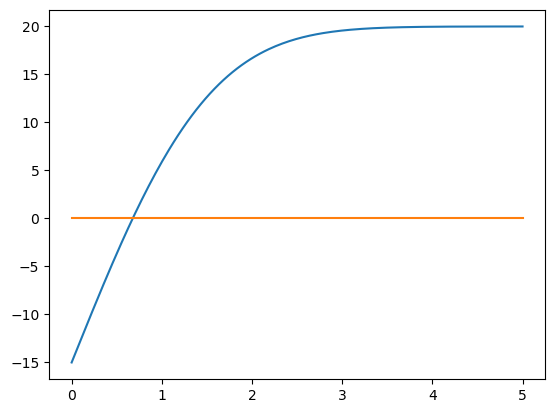

In [124]:
depths = np.linspace(0, 5, 200)
T = f(depths)
plt.plot(depths, T)
plt.plot(depths, depths*0)
plt.show()


 Bisection method with nmax=500 and tol=1.0e-13


|--n--|--an--|--bn--|----xn----|-|bn-an|--|---|f(xn)|---|
|--0--|0.0000|1.0000|0.50000000|1.00000000|3.65798445|
|--1--|0.5000|1.0000|0.75000000|0.50000000|1.42714820|
|--2--|0.5000|0.7500|0.62500000|0.25000000|1.04608268|
|--3--|0.6250|0.7500|0.68750000|0.12500000|0.20909592|
|--4--|0.6250|0.6875|0.65625000|0.06250000|0.41399601|
|--5--|0.6562|0.6875|0.67187500|0.03125000|0.10130712|
|--6--|0.6719|0.6875|0.67968750|0.01562500|0.05418240|
|--7--|0.6719|0.6797|0.67578125|0.00781250|0.02349064|
|--8--|0.6758|0.6797|0.67773438|0.00390625|0.01536384|
|--9--|0.6758|0.6777|0.67675781|0.00195312|0.00405891|
|--10--|0.6768|0.6777|0.67724609|0.00097656|0.00565359|
|--11--|0.6768|0.6772|0.67700195|0.00048828|0.00079762|
|--12--|0.6768|0.6770|0.67687988|0.00024414|0.00163058|
|--13--|0.6769|0.6770|0.67694092|0.00012207|0.00041646|
|--14--|0.6769|0.6770|0.67697144|0.00006104|0.00019058|
|--15--|0.6769|0.6770|0.67695618|0.00003052|0.00011294|
|--16

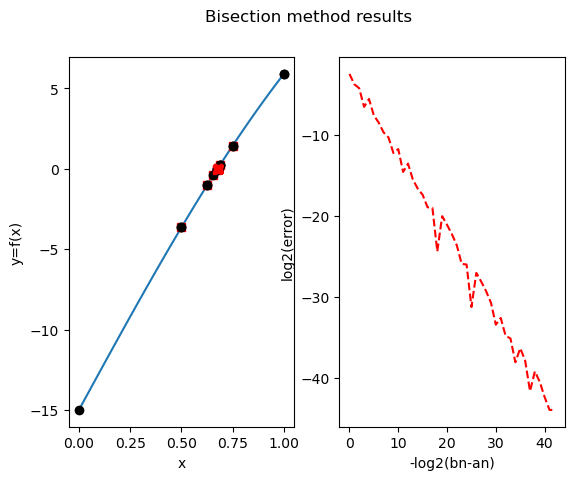

In [125]:
(r,rn) = bisect_method(f, 0, 1, 1e-13, 500, True)

In [126]:
r

0.6769618544819309

In [127]:
(r,rn,nfun) = newton_method(f, df, 10, 1e-13, 500, True)


 derivative at initial guess is near 0, try different x0 



UnboundLocalError: cannot access local variable 'r' where it is not associated with a value

In [128]:
(r,rn,nfun) = newton_method(f, df, 0.01, 1e-13, 500, True)


|--n--|----xn----|---|f(xn)|---|---|f'(xn)|---|
|--0--|0.01000000|14.76653810|39.49189870|
|--1--|0.38391310|6.18852308|37.52174745|
|--2--|0.54884473|2.62218581|35.56881888|
|--3--|0.62256620|1.09567922|34.51744025|
|--4--|0.65430898|0.45299776|34.03475610|
|--5--|0.66761883|0.18625691|33.82733040|
|--6--|0.67312494|0.07639145|33.74067675|
|--7--|0.67538902|0.03129786|33.70490374|
|--8--|0.67631760|0.01281716|33.69020812|
|--9--|0.67669804|0.00524795|33.68418334|
|--10--|0.67685384|0.00214860|33.68171540|
|--11--|0.67691763|0.00087964|33.68070480|
|--12--|0.67694375|0.00036012|33.68029102|
|--13--|0.67695444|0.00014743|33.68012162|
|--14--|0.67695882|0.00006036|33.68005227|
|--15--|0.67696061|0.00002471|33.68002387|
|--16--|0.67696135|0.00001012|33.68001225|
|--17--|0.67696165|0.00000414|33.68000749|
|--18--|0.67696177|0.00000170|33.68000554|
|--19--|0.67696182|0.00000069|33.68000474|
|--20--|0.67696184|0.00000028|33.68000442|
|--21--|0.67696185|0.00000012|33.68000428|
|--22--|0.6769

In [129]:
def func(x):
    return -(3*x**2-np.exp(x))**3

In [130]:
def dfunc(x):
    return -3*(3*x**2-np.exp(x))**2*(6*x-np.exp(x))

In [131]:
def ddfunc(x):
    return -3*2*(3*x**2-np.exp(x))*(6*x-np.exp(x)) + -3*(3*x**2-np.exp(x))**2*(6-np.exp(x))


|--n--|----xn----|---|f(xn)|---|---|f'(xn)|---|
|--0--|3.00000000|330.57909432|299.12730732|
|--1--|4.10514515|1028.74028361|11012.27263092|
|--2--|4.01172754|337.20405940|4530.49627243|
|--3--|3.93729771|108.72947672|1890.06327272|
|--4--|3.87977081|34.49486091|799.02613601|
|--5--|3.83659968|10.77995168|341.80711507|
|--6--|3.80506157|3.32486507|147.67828175|
|--7--|3.78254732|1.01448388|64.31112418|
|--8--|3.76677270|0.30694614|28.17507715|
|--9--|3.75587845|0.09228869|12.39811803|
|--10--|3.74843469|0.02762233|5.47278435|
|--11--|3.74338747|0.00824099|2.42109374|
|--12--|3.73998364|0.00245320|1.07267699|
|--13--|3.73769666|0.00072916|0.47574236|
|--14--|3.73616397|0.00021651|0.21114266|
|--15--|3.73513857|0.00006424|0.09375253|
|--16--|3.73445336|0.00001905|0.04164148|
|--17--|3.73399583|0.00000565|0.01849952|
|--18--|3.73369049|0.00000167|0.00821969|
|--19--|3.73348678|0.00000050|0.00365251|
|--20--|3.73335092|0.00000015|0.00162313|
|--21--|3.73326031|0.00000004|0.00072133|
|--22

/tmp/ipykernel_107668/1654521180.py:3: RuntimeWarning: divide by zero encountered in log
  plt.plot(n, np.log(rn-r))
/tmp/ipykernel_107668/1654521180.py:3: RuntimeWarning: invalid value encountered in log
  plt.plot(n, np.log(rn-r))


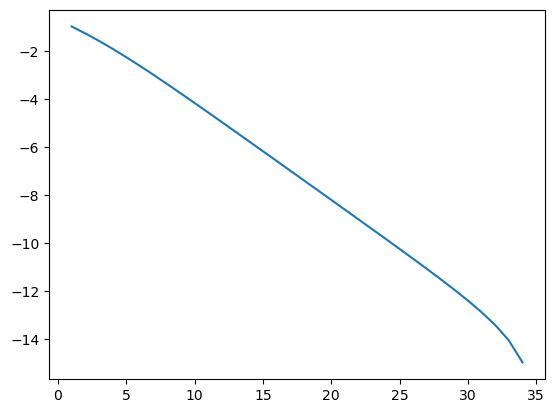

In [132]:
(r,rn,nfun) = newton_method(func, dfunc, 3, 1e-13, 500, True)
n = np.arange(0,rn.size)
plt.plot(n, np.log(rn-r))
plt.show()

In [133]:
print(r)

3.7330796497630856


In [134]:
# Found this expression with matlab symbolic math

def g(x):
    return -(np.exp(x) - 3*x**2)/(18*x - 3*np.exp(x))

def dg(x):
    return (2*np.exp(x) + x**2*np.exp(x) - 4*x*np.exp(x) + 6*x**2)/(6*x - np.exp(x))**2



|--n--|----xn----|---|f(xn)|---|---|f'(xn)|---|
|--0--|4.50000000|0.15481045|0.12693343|
|--1--|3.28038078|0.27506384|1.15354705|
|--2--|3.51883126|0.08976039|0.53048368|
|--3--|3.68803607|0.01566970|0.36317074|
|--4--|3.73118300|0.00063312|0.33450287|
|--5--|3.73307571|0.00000111|0.33333537|
|--6--|3.73307903|0.00000000|0.33333333|
|--7--|3.73307903|0.00000000|0.33333333|
Newton method converged succesfully, niter=7, nfun=16, f(r)=1.2e-16


/tmp/ipykernel_107668/584050461.py:3: RuntimeWarning: divide by zero encountered in log
  plt.plot(n, np.log(abs(rn-r)))


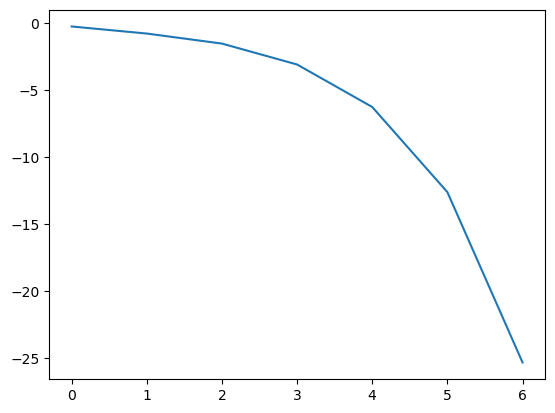

In [146]:
(r,rn,nfun) = newton_method(g, dg, 4.5, 1e-13, 500, True)
n = np.arange(0,rn.size)
plt.plot(n, np.log(abs(rn-r)))
plt.show()

In [147]:
print(r)


3.733079028632814


In [148]:
m = 3
def func_m(x):
    return m*func(x)


|--n--|----xn----|---|f(xn)|---|---|f'(xn)|---|
|--0--|3.00000000|991.73728297|299.12730732|
|--1--|6.31543546|244204630.45389205|290275406.77455682|
|--2--|5.47414948|9833933.97182807|13610916.87038464|
|--3--|4.75164606|332611.93417849|604187.19988882|
|--4--|4.20113468|7907.28033991|23787.61498114|
|--5--|3.86872303|79.40279828|657.27453433|
|--6--|3.74791689|0.07465675|5.10022422|
|--7--|3.73327895|0.00000018|0.00087740|
|--8--|3.73307907|0.00000000|0.00000000|
Newton method converged succesfully, niter=8, nfun=18, f(r)=1.1e-18


/tmp/ipykernel_107668/1398637401.py:3: RuntimeWarning: divide by zero encountered in log
  plt.plot(n, np.log(abs(rn-r)))


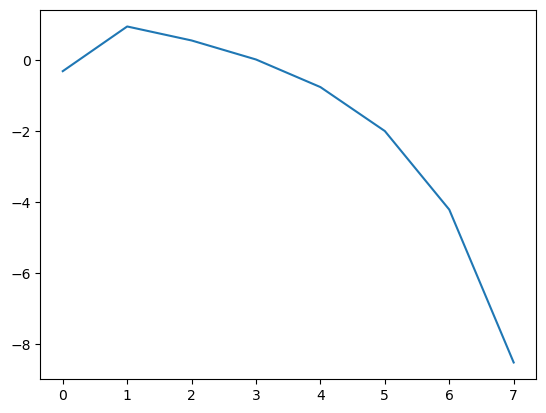

In [149]:
(r,rn,nfun) = newton_method(func_m, dfunc, 3, 1e-13, 500, True)
n = np.arange(0,rn.size)
plt.plot(n, np.log(abs(rn-r)))
plt.show()

In [150]:
def secant_method(f, x0, x1, tol, nmax, vrb = True):
    iters = 0
    rn = np.array([x0, x1])
    while((iters < nmax )):
        
        fx0 = f(x0)
        fx1 = f(x1)

        x2 = x1 - fx1*(x1 - x0)/(fx1 - fx0) 

        x0 = x1
        x1 = x2

        rn = np.append(rn,x2)
        iters += 1
        
        if(abs(x0 - x1) < tol):
            print("Secant method converged succesfully, niter=%d, f(r)=%1.1e" %(iters,np.abs(f(x1))));
            return x1, rn
    print("Secant Method Failed to Converge");
    return x1, rn 
        

In [151]:
def func_p5(x):
    return x**6 - x - 1
def dfunc_p5(x):
    return 6*x**5 - 1

Newton method converged succesfully, niter=8, nfun=18, f(r)=8.9e-16


/tmp/ipykernel_107668/2412056759.py:3: RuntimeWarning: divide by zero encountered in log
  plt.plot(n, np.log(abs(rn_newt-r_newt)))


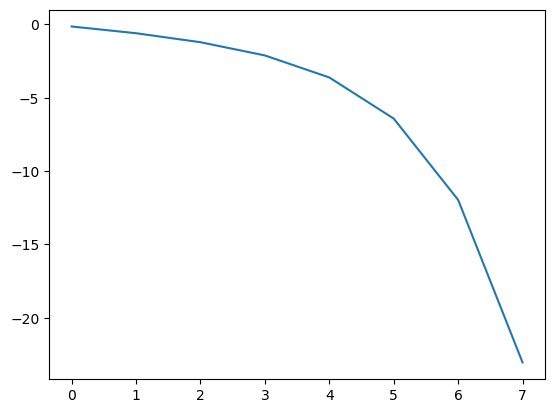

1.1347241384015194


In [155]:
(r_newt,rn_newt,nfun) = newton_method(func_p5, dfunc_p5, 2, 1e-13, 500)
n = np.arange(0,rn_newt.size)
plt.plot(n, np.log(abs(rn_newt-r_newt)))
plt.show()
print(r_sec)

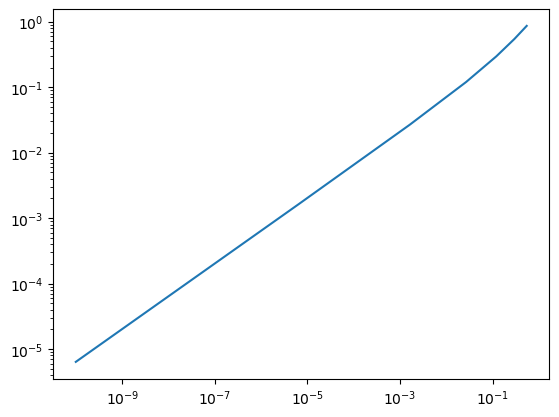

In [165]:
x_k1 = rn_newt[1:rn_newt.size-1]
x_k0 = rn_newt[0:rn_newt.size-2]

plt.loglog(abs(x_k1 - r_newt), abs(x_k0 - r_newt))
plt.show()

Secant method converged succesfully, niter=9, f(r)=8.9e-16


/tmp/ipykernel_107668/3441965694.py:3: RuntimeWarning: divide by zero encountered in log
  plt.plot(n, np.log(abs(rn_sec-r_sec)))


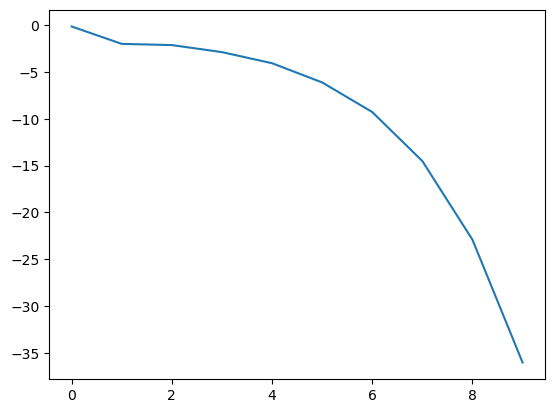

1.1347241384015194


In [157]:
(r_sec,rn_sec) = secant_method(func_p5, 2,1, 1e-13, 500)
n = np.arange(0,rn_sec.size)
plt.plot(n, np.log(abs(rn_sec-r_sec)))
plt.show()
print(r_sec)

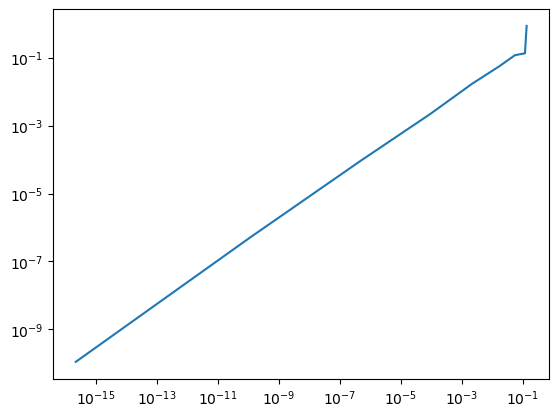

In [166]:
x_k1 = rn_sec[1:rn_sec.size-1]
x_k0 = rn_sec[0:rn_sec.size-2]

plt.loglog(abs(x_k1 - r_sec), abs(x_k0 - r_sec))
plt.show()